# VAR model
https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [194]:
import os
from tqdm import tqdm
from datetime import datetime
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import warnings
warnings.filterwarnings('ignore')

## 读取数据

In [181]:
root_1 = '../Dataset'
df_ori = pd.read_csv(os.path.join(root_1, '3bs_8q_4p_dataset_washed.csv'),
                parse_dates=['datetime'],
                 index_col = 0)
columns = ['q'+str(i) for i in range(1,12)] + ['p'+str(j) for j in range(1,8)]

## Testing causation

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in tqdm(df.columns):
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
columns = ['q'+str(i) for i in range(1,12)] + ['p'+str(j) for j in range(1,8)]
matrix = grangers_causation_matrix(df[columns], columns) 

 61%|██████████████████████████████████████████████████                                | 11/18 [01:56<01:14, 10.63s/it]G:\Anaconda\envs\pytorch_env\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
G:\Anaconda\envs\pytorch_env\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
G:\Anaconda\envs\pytorch_env\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
 67%|██████████████████████████████████████████████████████▋                           | 12/18 [02:07<01:04, 10.71s/it]G:\Anaconda\envs\pytorch_env\lib\site-packages\statsmodels\base\model

,q1_x,q2_x,q3_x,q4_x,q5_x,q6_x,q7_x,q8_x,q9_x,q10_x,q11_x,p1_x,p2_x,p3_x,p4_x,p5_x,p6_x,p7_x
q1_y,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2_y,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3_y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4_y,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q5_y,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q6_y,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q7_y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q8_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q9_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q10_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
test_result = grangercausalitytests(df[['p1', 'p2']], maxlag=maxlag, verbose=False)
p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]

In [45]:
p_values

[0.0, 0.127, 0.0093, 0.0031, 0.0002, 0.0026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Decompose

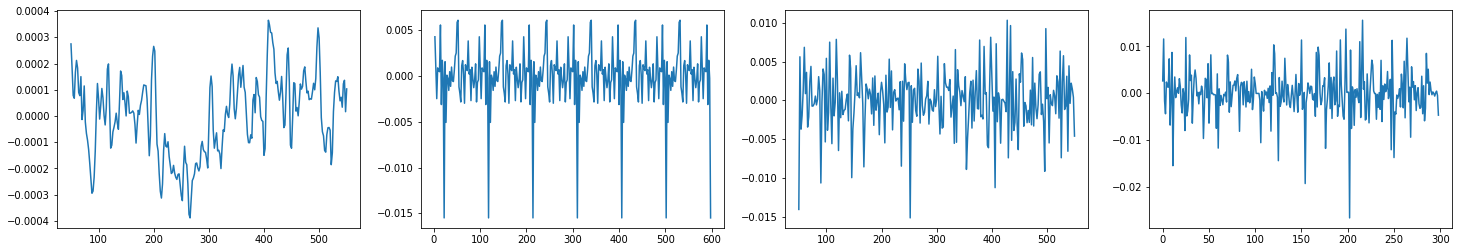

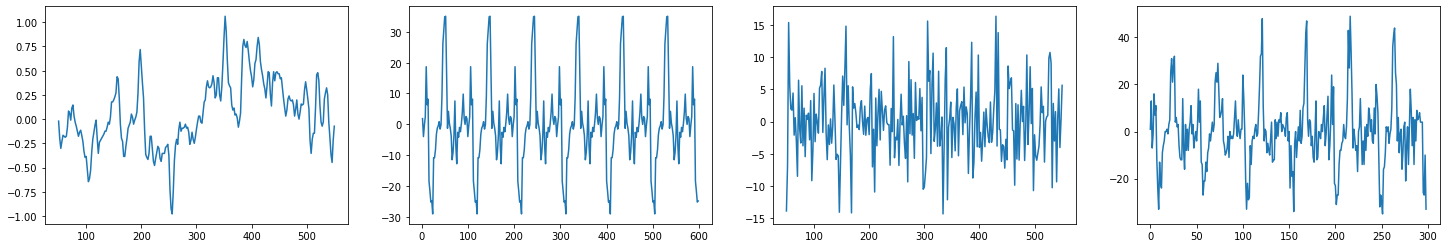

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
def plot_decompose(x):
    plt.figure(facecolor='w', figsize=(25,4))
    ss_decomposition = seasonal_decompose(x=x, model='additive', freq=48)
    plt.subplot(141)
    plt.plot(ss_decomposition.trend)
    plt.subplot(142)
    plt.plot(ss_decomposition.seasonal)
    plt.subplot(143)
    plt.plot(ss_decomposition.resid)
    plt.subplot(144)
    plt.plot(x.values)
df = df_ori.copy()
plot_decompose(df['p5'].diff().iloc[1:300])
plot_decompose(df['q8'].diff().iloc[1:300])

# VAR模型

## 正规化 + 一阶差分

In [184]:
df = df_ori.copy()
# 正规化
from sklearn import preprocessing
def df_normalize(df, columns):
    x = df[columns].values
    min_max_scaler = preprocessing.MinMaxScaler()
    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)
    df[columns] = x_scaled
    return df
df = df_normalize(df, columns)

# 分割，提取未差分序列
split_point = datetime.timestamp(datetime(2019,1,1))
df_test_ori = df[df['timestamp'] > split_point].copy()
# df_test_ori = df_test_ori.iloc[1:].copy()

# 提取差分序列
df[columns] = df[columns].diff().fillna(0)
# df = df.iloc[1:]
df_train = df[df['timestamp'] < split_point].copy()
df_test = df[df['timestamp'] > split_point].copy()

# 确定lag的值，不是很有效

In [371]:
model = VAR(df_test[columns].values)
x = model.select_order(9)
x.summary()

,AIC,BIC,FPE,HQIC
0,-101.8,-101.8,6.077e-45,-101.8
1,-105.0,-104.5,2.536e-46,-104.8
2,-105.9,-105.0*,9.825e-47,-105.6
3,-106.4,-105.0,6.340e-47,-105.9
4,-106.7,-104.8,4.558e-47,-106.0
5,-106.9,-104.6,3.669e-47,-106.1*
6,-107.1,-104.3,3.169e-47,-106.1
7,-107.2,-103.9,2.738e-47,-106.1
8,-107.3,-103.6,2.520e-47,-106.0
9,-107.4*,-103.2,2.348e-47*,-105.9


## 实验一，直接作用于 diff=1 序列

In [373]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

datetime : 2.01
timestamp : 2.0
q1 : 2.0
p1 : 2.02
p2 : 2.0
q2 : 2.02
q3 : 2.0
p3 : 2.0
q4 : 2.02
q5 : 2.01
q6 : 2.0
q7 : 2.0
q8 : 2.0
q9 : 2.0
q10 : 2.01
q11 : 2.0
p4 : 2.0
p5 : 2.0


In [40]:
hist_lag = 48*7
future_lag = 4
fit_size = 3
station_for_pred = 'q8'
df_test_ori['VAR_pred'] = 0
for i in tqdm(range(0, df_test.shape[0]-hist_lag-future_lag)):
    forecast_input = df_test[columns].values[i: i+hist_lag]
    model = VAR(forecast_input)
    model_fitted = model.fit(fit_size)
    
    forecast_output = pd.DataFrame(model_fitted.forecast(y=forecast_input, steps=4), columns=columns)
    diff = forecast_output[station_for_pred].sum()
    df_test_ori['VAR_pred'].iloc[i+hist_lag+future_lag-1] = df_test_ori[station_for_pred].iloc[i+hist_lag-1] + diff


  0%|                                                                     | 0/4153 [00:00<?, ?it/s]G:\Anaconda\envs\pytorch_env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)

 57%|████████████████████████████████▌                        | 2376/4153 [00:08<00:05, 305.38it/s]


100%|█████████████████████████████████████████████████████████| 4153/4153 [00:14<00:00, 292.80it/s]

In [42]:
from sklearn import metrics
from sklearn import preprocessing
def eval_metrics(y_true, y_pred):
    metrics_dict = dict()
    metrics_dict['MAE'] = metrics.mean_absolute_error(y_true, y_pred)
    metrics_dict['MSE'] = metrics.mean_squared_error(y_true, y_pred)
    metrics_dict['MAPE'] = np.mean(np.true_divide(np.abs(y_true-y_pred), y_true))
    return metrics_dict

G:\Anaconda\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


{'MAE': 0.13499607394641858, 'MSE': 0.0353849031955107, 'MAPE': inf}


(60000, 61000)

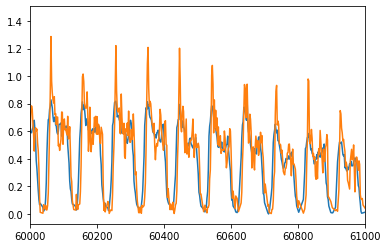

In [46]:
mask1 = df_test_ori['VAR_pred']<2
mask2 = df_test_ori['VAR_pred']>0

df_test_ori['VAR_pred'] = df_test_ori['VAR_pred'][mask1&mask2].interpolate()
df_eval = df_test_ori[48*7+4:].dropna()

y_true = df_eval[station_for_pred].values
y_pred = df_eval['VAR_pred'].values
# .interpolate().iloc[start: size].values
eval_dict = eval_metrics(y_true, y_pred)
print(eval_dict)


df_eval[station_for_pred].plot()
df_eval['VAR_pred'].plot()
plt.xlim(60000,61000)

## 实验2：Decompose (diff=1 - seasonal) + VAR

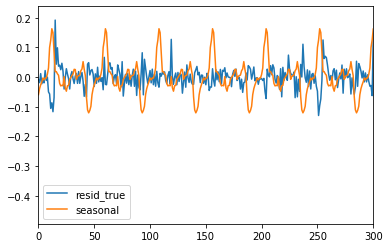

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose
def datetime_train_to_2019(x):
    return(datetime(2019,x.month,x.day,x.hour, x.minute, 0))
train_decomposition = seasonal_decompose(x=df_train[columns], model='additive', freq=48)
df_train_seasonal = train_decomposition.seasonal
df_train_seasonal['datetime_2019'] = df_train['datetime'].copy().apply(datetime_train_to_2019)
df_train_resid = df_train[columns].copy() - df_train_seasonal.copy()
df_train_resid.index = df_train['datetime']

test_decomposition = seasonal_decompose(x=df_test[columns], model='additive', freq=48)
df_test_seasonal = pd.DataFrame(index=df_test['datetime'])
df_test_seasonal = df_test_seasonal.join(df_train_seasonal.set_index('datetime_2019'))
df_test_resid = df_test.set_index('datetime')[columns].copy() - df_test_seasonal.copy()
# df_test_ori.set_index('datetime', inplace=True)
# df_test_seasonal['datetime'] = df_test['datetime']
# df_test_seasonal.set_index['dateti']
# df_resid = df_test[columns] - df_seasonal
plt.figure()
plt.plot(df_test_resid[station_for_pred].values)
plt.plot(df_test_seasonal[station_for_pred].values)
plt.legend(['resid_true', 'seasonal'])
plt.xlim(0,300)
plt.show()

In [192]:
model = VAR(df_train_resid[columns].interpolate().fillna(0).values)
hist_lag = 48*3
model_fitted = model.fit(hist_lag)

In [225]:
# hist_lag = 48*7
# hist_lag = 48*2
future_lag = 4
fit_size = 4
station_for_pred = 'q8'
df_test_ori['diff_resid'] = 0
df_test_ori['diff_resid_2h'] = 0
df_test_ori['diff_resid_30min'] = 0
for i in tqdm(range(0, df_test.shape[0]-hist_lag-future_lag)):
    forecast_input = df_test_resid[columns].copy().values[i: i+hist_lag]
#     model = VAR(forecast_input)
#     model_fitted = model.fit(fit_size)
    forecast_output = pd.DataFrame(model_fitted.forecast(y=forecast_input, steps=4), columns=columns)
    df_test_ori['diff_resid'].iloc[i+hist_lag+future_lag-1] = forecast_output[station_for_pred].copy().sum()
    df_test_ori['diff_resid_30min'].iloc[i+hist_lag+1-1] = forecast_output[station_for_pred].iloc[0].copy()
    df_test_ori['diff_resid_2h'].iloc[i+hist_lag+future_lag-1] = forecast_output[station_for_pred].iloc[-1].copy()


 58%|█████████████████████████████████▏                       | 2529/4345 [00:08<00:05, 305.06it/s]


100%|█████████████████████████████████████████████████████████| 4345/4345 [00:14<00:00, 305.43it/s]

{'MAE': 0.025339485979000896, 'MSE': 0.001167424571273625, 'MAPE': -0.3781786872780192}
30min {'MAE': 0.024238512245118995, 'MSE': 0.0010431293362863816, 'MAPE': -0.35965664987682305}
0 {'MAE': 0.028752241077776595, 'MSE': 0.0015994602036928224, 'MAPE': 0.0020031159581571333}


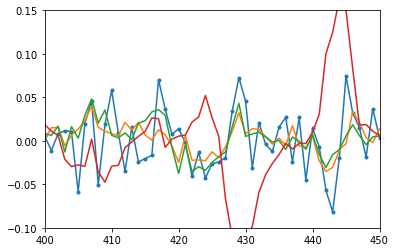

In [226]:
# 探究 residual 预测效果 
print(eval_metrics(df_test_resid[station_for_pred].values, df_test_ori['diff_resid_2h'].values))
print('30min', eval_metrics(df_test_resid[station_for_pred].values, df_test_ori['diff_resid_30min'].values))
df_test_ori['0'] = 0
print('0', eval_metrics(df_test_resid[station_for_pred].values, df_test_ori['0'].values))
plt.plot(df_test_resid[station_for_pred].values,'.-')
plt.plot(df_test_ori['diff_resid_2h'].values)
plt.plot(df_test_ori['diff_resid_30min'].values)
plt.plot(df_test_seasonal[station_for_pred].values)
plt.xlim(400,450)
plt.ylim(-0.1, 0.15)
plt.show()

resid {'MAE': 0.04279799799924614, 'MSE': 0.0032566722288978225, 'MAPE': inf}
noresid {'MAE': 0.06509499524126414, 'MSE': 0.009419191628280015, 'MAPE': inf}
no_resid_30min {'MAE': 0.02880032884455033, 'MSE': 0.0016047267157556263, 'MAPE': inf}
resid_30min {'MAE': 0.02412590502921569, 'MSE': 0.0010290707880575417, 'MAPE': inf}


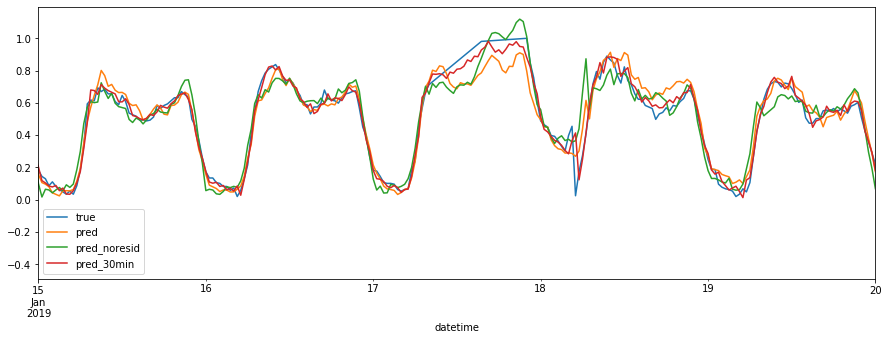

In [227]:
# df_test_ori.set_index('datetime', inplace=True)
df_test_ori['diff_seasonal'] = df_test_seasonal[station_for_pred].copy().rolling(4).sum()
df_test_ori['diff'] = df_test_ori['diff_seasonal'] + df_test_ori['diff_resid']
df_test_ori['VAR_pred_noresid'] = df_test_ori['diff_seasonal'] + df_test_ori[station_for_pred].copy().shift(4)
df_test_ori['VAR_pred'] = df_test_ori['diff'] + df_test_ori[station_for_pred].copy().shift(4)
df_test_ori['diff_resid_2h_ori'] = df_resid[station_for_pred].copy()

df_test_ori['VAR_pred_30min'] = df_test_seasonal[station_for_pred].copy() + df_test_ori['diff_resid_30min'] + df_test_ori[station_for_pred].copy().shift(1)
df_test_ori['VAR_pred_noresid_30min'] = df_test_seasonal[station_for_pred].copy() + df_test_ori[station_for_pred].copy().shift(1)

df_eval = df_test_ori.iloc[hist_lag+future_lag:]
print('resid', eval_metrics(df_eval[station_for_pred].values, df_eval['VAR_pred'].values))
print('noresid', eval_metrics(df_eval[station_for_pred].values, df_eval['VAR_pred_noresid'].values))

print('no_resid_30min', eval_metrics(df_eval[station_for_pred].values, df_eval['VAR_pred_noresid_30min'].values))
print('resid_30min', eval_metrics(df_eval[station_for_pred].values, df_eval['VAR_pred_30min'].values))

plt.figure(figsize=(15,5))
# plt.subplot(121)
df_eval[station_for_pred].plot()
df_eval['VAR_pred'].plot()
df_eval['VAR_pred_noresid'].plot()
df_eval['VAR_pred_30min'].plot()
plt.legend(['true', 'pred', 'pred_noresid', 'pred_30min'])
plt.xlim(datetime(2019,1,15), datetime(2019,1,20))
plt.show()

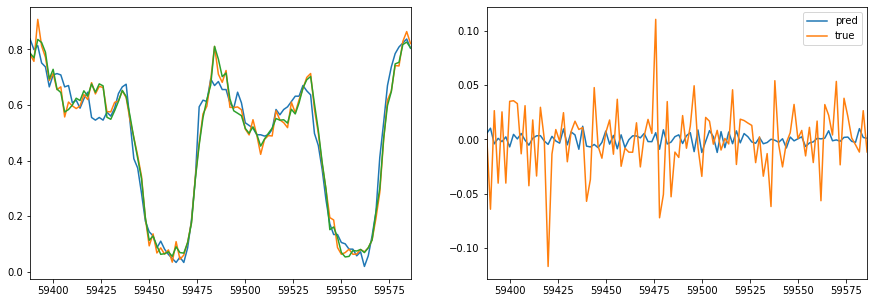

In [39]:
# def reconstruct(df_test_ori, df_test, df_seasonal, df_resid, df_resid_pred):
#     df_test
    df_eval = df_test_ori[48*7+4:]
    df_plot = df_eval[300:400]
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    df_plot[station_for_pred].plot()
    df_plot['VAR_pred'].plot()
    df_plot['VAR_pred_noresid'].plot()
    plt.subplot(122)
    
    df_plot['diff_resid_2h'].plot()
    df_plot['diff_resid_2h_ori'].plot()
    plt.legend(['pred','true'])

noresid {'MAE': 0.05555079380405969, 'MSE': 0.006605878866090074, 'MAPE': inf}
pred {'MAE': 0.06032611070219403, 'MSE': 0.007487996189420374, 'MAPE': inf}

In [28]:
y_true = df_eval[station_for_pred].values
y_pred = df_eval['VAR_pred'].values
# .interpolate().iloc[start: size].values
eval_dict = eval_metrics(y_true, y_pred)
eval_dict

G:\Anaconda\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


{'MAE': 0.06032611070219403, 'MSE': 0.007487996189420374, 'MAPE': inf}

Exp2, lag = 48\*7, fit_size=4 'p5': 
{'MAE': 0.11905161942804082,
 'MSE': 0.024663431027881363,
 'MAPE': 0.2634311435864964}
 
Exp2, lag = 48\*7, fit_size=3 'p5': 
{'MAE': 0.1164299049401179,
 'MSE': 0.02362388460510355,
 'MAPE': 0.2517878187430798}
 
Exp2, lag = 48\*7, fit_size=2 'p5': 
{'MAE': 0.11754596674536481,
 'MSE': 0.02403906947867648,
 'MAPE': 0.2554889436004356}

Exp1, lag = 48\*7, fit_size=4 'q8': 
{'MAE': 0.1342984505492552, 'MSE': 0.03413212012732424, 'MAPE': inf}

Exp1, lag = 48\*7, fit_size=3 'q8': 
{'MAE': 0.13499607394641858, 'MSE': 0.0353849031955107, 'MAPE': inf}

Exp2, lag = 48\*7, fit_size=3 'q8': 
{'MAE': 0.07453523471064954, 'MSE': 0.010771776690885802, 'MAPE': inf}

Exp2, lag = 48\*7, fit_size=4 'q8': 
{'MAE': 0.07515072779829524, 'MSE': 0.010755662112653164, 'MAPE': inf}


结论：有没有去周期对效果影响很大

In [387]:
station_for_pred

'q8'

### 实验 没有diff

In [428]:
df3 = df_test_ori[columns].copy()

In [486]:
df3.head(2)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,p1,p2,p3,p4,p5,p6,p7
58108,0.260244,0.417385,0.268849,0.205993,0.057143,0.304569,0.077670,0.167464,0.033333,0.119891,0.09375,0.0,0.0,0.0,0.212010,0.369831,0.645631,0.670678
58110,0.263120,0.415316,0.243067,0.187266,0.054762,0.253807,0.135922,0.153110,0.053846,0.100817,0.09375,0.0,0.0,0.0,0.191906,0.318535,0.611650,0.708494


In [482]:
hist_lag = 48*7
fit_size = 2
future_lag = 4
station_for_pred = 'q8'
df_test_ori['VAR_pred'] = 0
for i in tqdm(range(0, df_test.shape[0]-hist_lag-future_lag)):
    
    forecast_input = df3[columns].values[i: i+hist_lag]
    model = VAR(forecast_input)
    model_fitted = model.fit(fit_size)
    forecast_output = pd.DataFrame(model_fitted.forecast(y=forecast_input, steps=4), columns=columns)
#     diff = forecast_output[station_for_pred].sum() + \
#     df_seasonal[station_for_pred].iloc[i+hist_lag:i+hist_lag+future_lag].sum()
    df_test_ori['VAR_pred'].iloc[i+hist_lag+future_lag-1] = forecast_output[station_for_pred].iloc[-1]

  0%|                                                                                         | 0/4153 [00:00<?, ?it/s]G:\Anaconda\envs\pytorch_env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|█████████████████████████████████████████████████████████████████████████████| 4153/4153 [00:15<00:00, 266.44it/s]


In [483]:
mask1 = df_test_ori['VAR_pred']<2
mask2 = df_test_ori['VAR_pred']>0
df_test_ori['VAR_pred'] = df_test_ori['VAR_pred'][mask1&mask2].interpolate()
# df_test_ori['VAR_pred'].describe()

In [484]:
df_eval = df_test_ori[48*7+4:].dropna()
y_true = df_eval[station_for_pred].values
y_pred = df_eval['VAR_pred'].values
# .interpolate().iloc[start: size].values
eval_dict = eval_metrics(y_true, y_pred)
eval_dict

G:\Anaconda\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


{'MAE': 0.09940152321979398, 'MSE': 0.01709940824065108, 'MAPE': inf}

(60000, 61000)

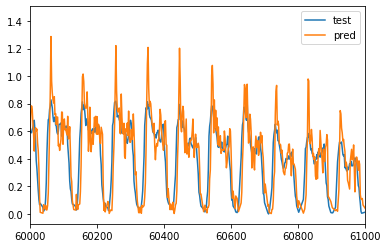

In [510]:
df_plot = df_eval[300:]
df_plot[station_for_pred].plot()

df_plot['VAR_pred'].plot()
plt.legend(['test','pred'])
plt.xlim(60000,61000)

Exp3, hist_lag=48\*7, 'q8', inputs_size=2
{'MAE': 0.09940152321979398, 'MSE': 0.01709940824065108, 'MAPE': inf}

Exp3, hist_lag=48\*7, 'q8', inputs_size=3
{'MAE': 0.0981168601883205, 'MSE': 0.016684840616750955, 'MAPE': inf}

Exp3, hist_lag=48\*7, 'q8', inputs_size=4
{'MAE': 0.09971416928870663, 'MSE': 0.017446959313723948, 'MAPE': inf}

Exp3, hist_lag=48\*7, 'q8', inputz_size=7
{'MAE': 0.10094444380151142, 'MSE': 0.017263520104273417, 'MAPE': inf}

Exp3, hist_lag=48\*7, 'q8', inputz_size=5
{'MAE': 0.10043175785225784, 'MSE': 0.01744101674216203, 'MAPE': inf}